In [58]:
# read in UK_flattened_output_big_eps.npy
import numpy as np
import matplotlib.pyplot as plt

file_names = ['UK_standard_jan31.npy', 'US_standard_jan31.npy','UK_specific_soc_jan31.npy', 'US_specific_soc_jan31.npy','US_big_eps_jan31.npy','UK_finer_jan31.npy','US_finer_jan31.npy']

Parameters used

In [59]:
epsilon = 0.01
infty = 10000000
state_values = np.arange(-2.8,2.8,0.28)
S = np.arange(0,20,1)
costs = np.arange(0,5,1) # change these params depending on what I used in running the notebook
possible_soc_terms = np.arange(0,5,1)
possible_inf_terms = np.arange(0,5,1)
theta_to_test = np.arange(0,20,2)

In [60]:
def convert_to_thetas(theta_index):
    theta_index = (int(theta_index*10**-5),int((theta_index%10**5)*10**-4),int((theta_index%10**4)*10**-3),int((theta_index%10**3)*10**-2),int((theta_index%10**2)*10**-1),int(theta_index%10))
    return tuple(float(round(state_values[2*theta],3) )for theta in theta_index)

Reshaping when for looping over t1,t2,t3

In [61]:
all_results = []
for name in file_names:
    print(name)
    results = np.load(name, allow_pickle=True)
    results = results.reshape(len(theta_to_test),len(theta_to_test),len(theta_to_test),len(possible_soc_terms),len(possible_inf_terms),len(costs),len(theta_to_test),len(theta_to_test),len(theta_to_test)).transpose(0,1,2,8,7,6,5,4,3)
    best_thetas = np.zeros((len(costs),len(possible_inf_terms),len(possible_soc_terms)),dtype=int)
    for c in range(len(costs)):
        for inf in range(len(possible_inf_terms)):
            for soc in range(len(possible_soc_terms)):
                best_thetas[c,inf,soc] = np.argmax(results[:,:,:,:,:,:,c,inf,soc])
                print(costs[c],possible_inf_terms[inf],possible_soc_terms[soc],best_thetas[c,inf,soc],np.max(results[:,:,:,:,:,:,c,inf,soc]))
    unique_thetas = np.unique(best_thetas)
    cube_for_each_thetas = [results.flatten()[index*125:(index+1)*125] for index in unique_thetas ]
    unique_thetas = [convert_to_thetas(theta) for theta in unique_thetas]
    del results
    all_results.append((cube_for_each_thetas ,unique_thetas,best_thetas))

UK_standard_jan31.npy
0 0 0 0 -2021.459
0 0 1 0 -2021.4589
0 0 2 0 -2021.459
0 0 3 0 -2021.459
0 0 4 0 -2021.459
0 1 0 402255 -1894.893
0 1 1 402255 -1891.2568
0 1 2 402255 -1891.1451
0 1 3 402255 -1892.5298
0 1 4 402255 -1895.0554
0 2 0 900241 -1972.1968
0 2 1 900241 -1971.009
0 2 2 900241 -1971.1255
0 2 3 900241 -1971.8711
0 2 4 900241 -1973.0547
0 3 0 900231 -1986.6406
0 3 1 900231 -1986.605
0 3 2 900231 -1987.0457
0 3 3 900231 -1987.6375
0 3 4 900231 -1988.3918
0 4 0 900231 -1992.786
0 4 1 900231 -1994.3579
0 4 2 231 -1995.8853
0 4 3 231 -1996.789
0 4 4 231 -1998.4021
1 0 0 0 -2021.4589
1 0 1 0 -2021.459
1 0 2 0 -2021.459
1 0 3 0 -2021.4589
1 0 4 0 -2021.459
1 1 0 402255 -1888.0813
1 1 1 402255 -1888.3857
1 1 2 402255 -1888.4246
1 1 3 402255 -1888.0645
1 1 4 402255 -1888.4524
1 2 0 900241 -1972.6578
1 2 1 900241 -1971.448
1 2 2 900241 -1971.4868
1 2 3 900241 -1972.1179
1 2 4 900241 -1973.1501
1 3 0 900231 -1987.5667
1 3 1 900231 -1987.5281
1 3 2 900231 -1987.9575
1 3 3 900231 -1988

Reshaping when for looping over t1,t2,t3,t4

In [ ]:
all_results = []
for name in file_names:
    print(name)
    results = np.load(name, allow_pickle=True)
    results = results.reshape(len(theta_to_test),len(theta_to_test),len(theta_to_test),len(theta_to_test),len(possible_soc_terms),len(possible_inf_terms),len(costs),len(theta_to_test),len(theta_to_test)).transpose(0,1,2,3,8,7,6,5,4)
    best_thetas = np.zeros((len(costs),len(possible_inf_terms),len(possible_soc_terms)),dtype=int)
    for c in range(len(costs)):
        for inf in range(len(possible_inf_terms)):
            for soc in range(len(possible_soc_terms)):
                best_thetas[c,inf,soc] = np.argmax(results[:,:,:,:,:,:,c,inf,soc])
                print(costs[c],possible_inf_terms[inf],possible_soc_terms[soc],best_thetas[c,inf,soc],np.max(results[:,:,:,:,:,:,c,inf,soc]))
    unique_thetas = np.unique(best_thetas)
    cube_for_each_thetas = [results.flatten()[index*125:(index+1)*125] for index in unique_thetas ]
    unique_thetas = [convert_to_thetas(theta) for theta in unique_thetas]
    del results
    all_results.append((cube_for_each_thetas ,unique_thetas,best_thetas))

In [62]:
# convert to a flattened arr of length 125 to a 3d array
for i in range(len(all_results)):
    cubes = all_results[i][0]
    for j in range(len(cubes)):
        all_results[i][0][j] = cubes[j].reshape(5,5,5)

In [79]:
def plot_results(cube_for_each_thetas,unique_thetas, cost_pos,inf_pos,soc_pos,country):
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))
    cmap = plt.cm.viridis.copy()  
    cmap.set_under('black') 
    axes = axes.flatten()
    if cost_pos == 0:
        x_var = 'cost'
    if inf_pos == 0:
        x_var = 'inf'
    if soc_pos == 0:
        x_var = 'soc'
    if cost_pos == 1:
        y_var = 'cost'
    if inf_pos == 1:
        y_var = 'inf'
    if soc_pos == 1:
        y_var = 'soc'
    for i, cube in enumerate(cube_for_each_thetas):
        grid = np.zeros((5, 5))
        for y_index in range(5):
            for x_index in range(5):    
                grid[y_index, x_index] = np.max(cube.transpose(cost_pos,inf_pos,soc_pos)[x_index,y_index,:])
        ax = axes[i]
        max_val = np.max(grid)
        im = ax.imshow(grid, cmap=cmap,vmin=max_val-20)
        # label x and y axes
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)
        ax.set_title(f'Thetas {unique_thetas[i]}')
        fig.colorbar(im, ax=ax)
    plt.suptitle(f'{y_var} against {x_var} for {country}')
    plt.tight_layout()
    plt.show()

UK_finer_jan31.npy


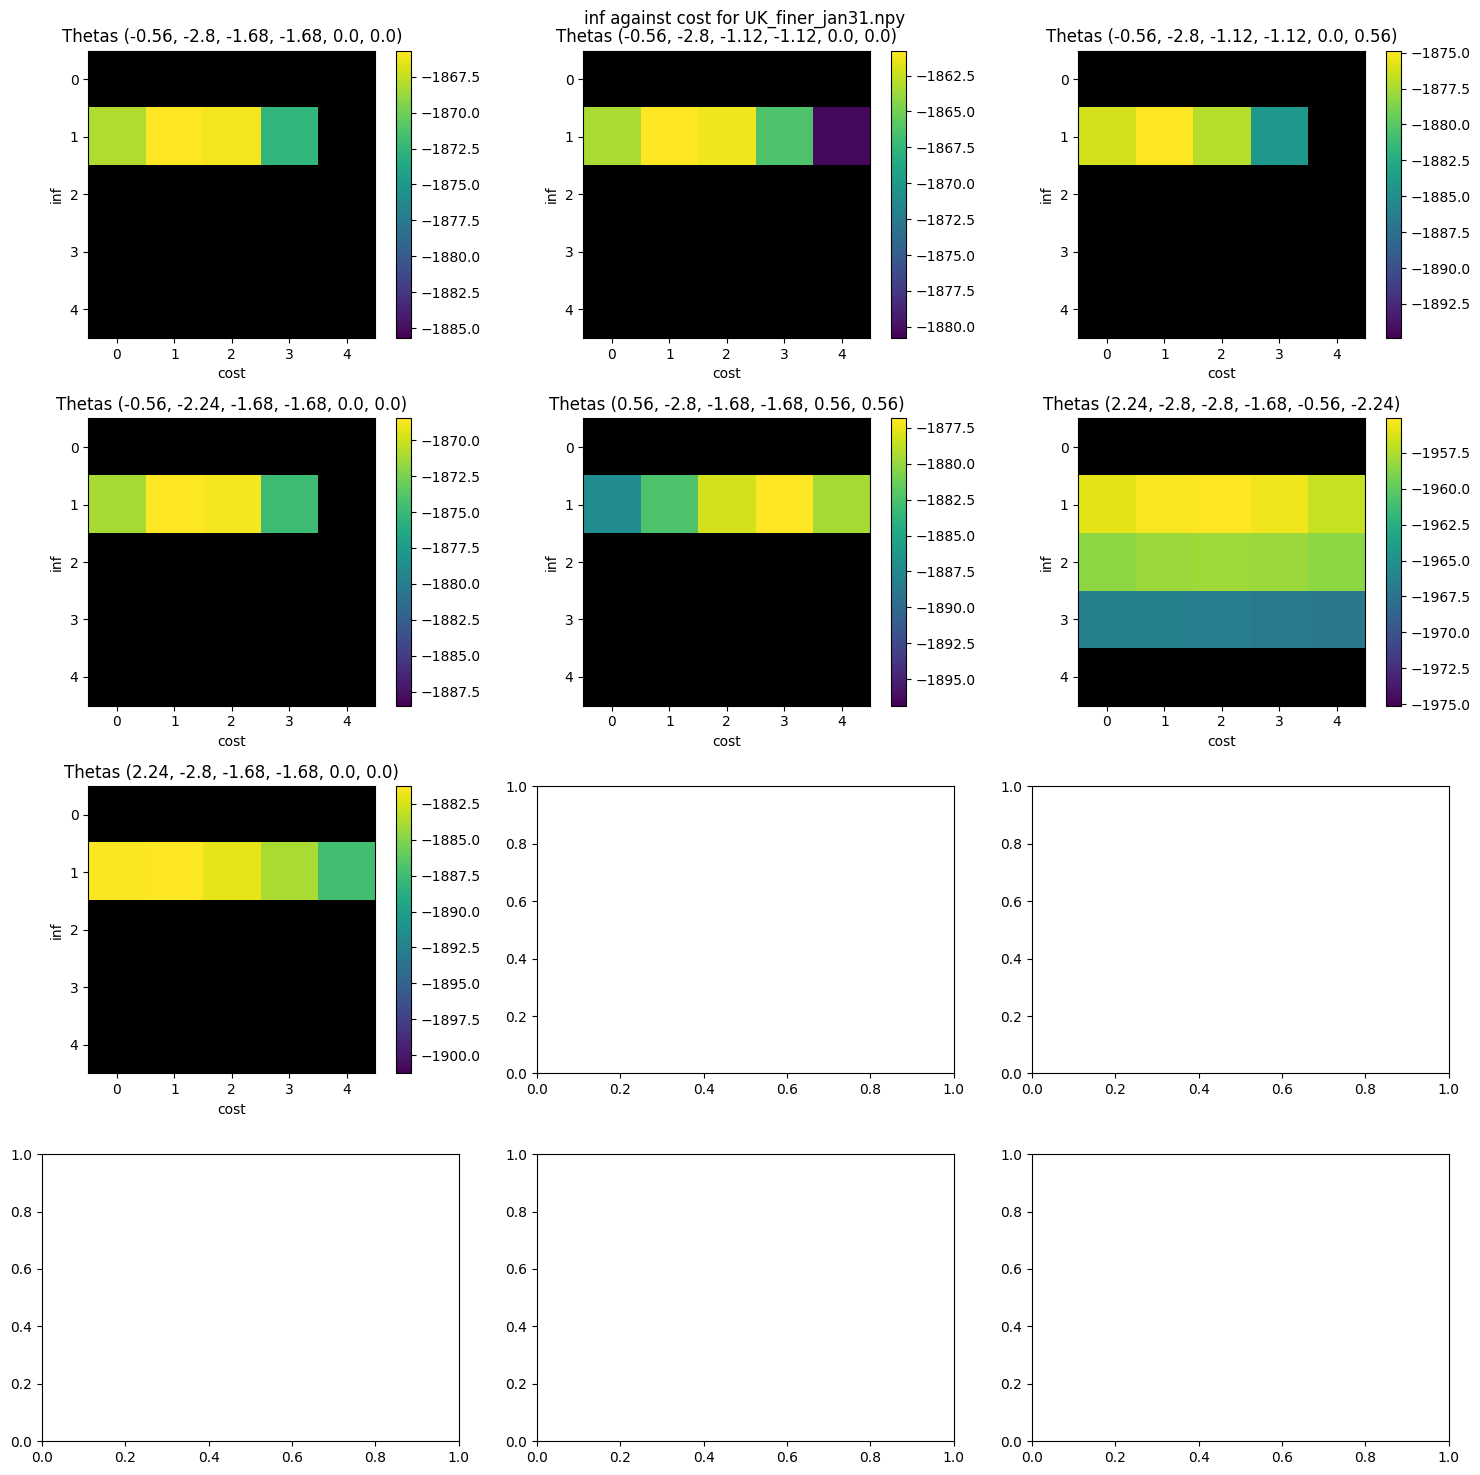

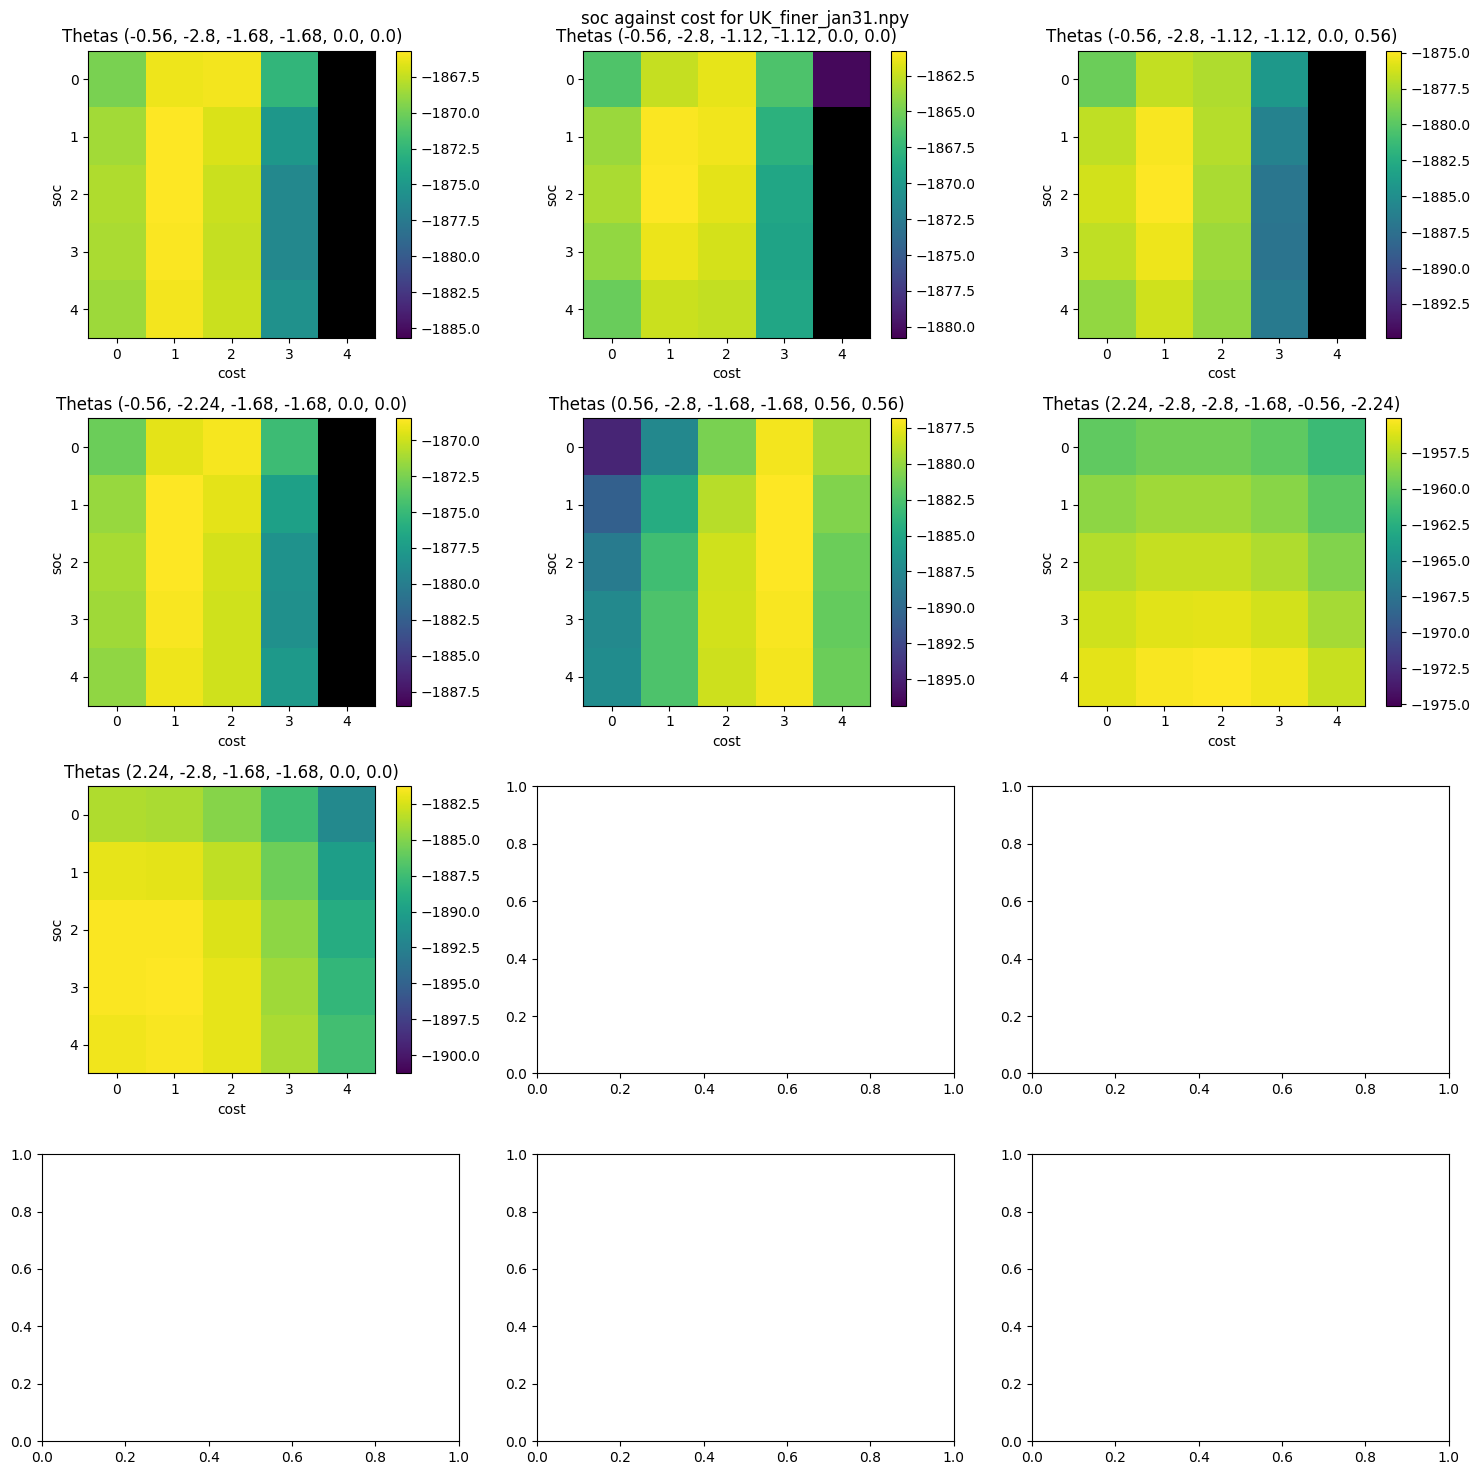

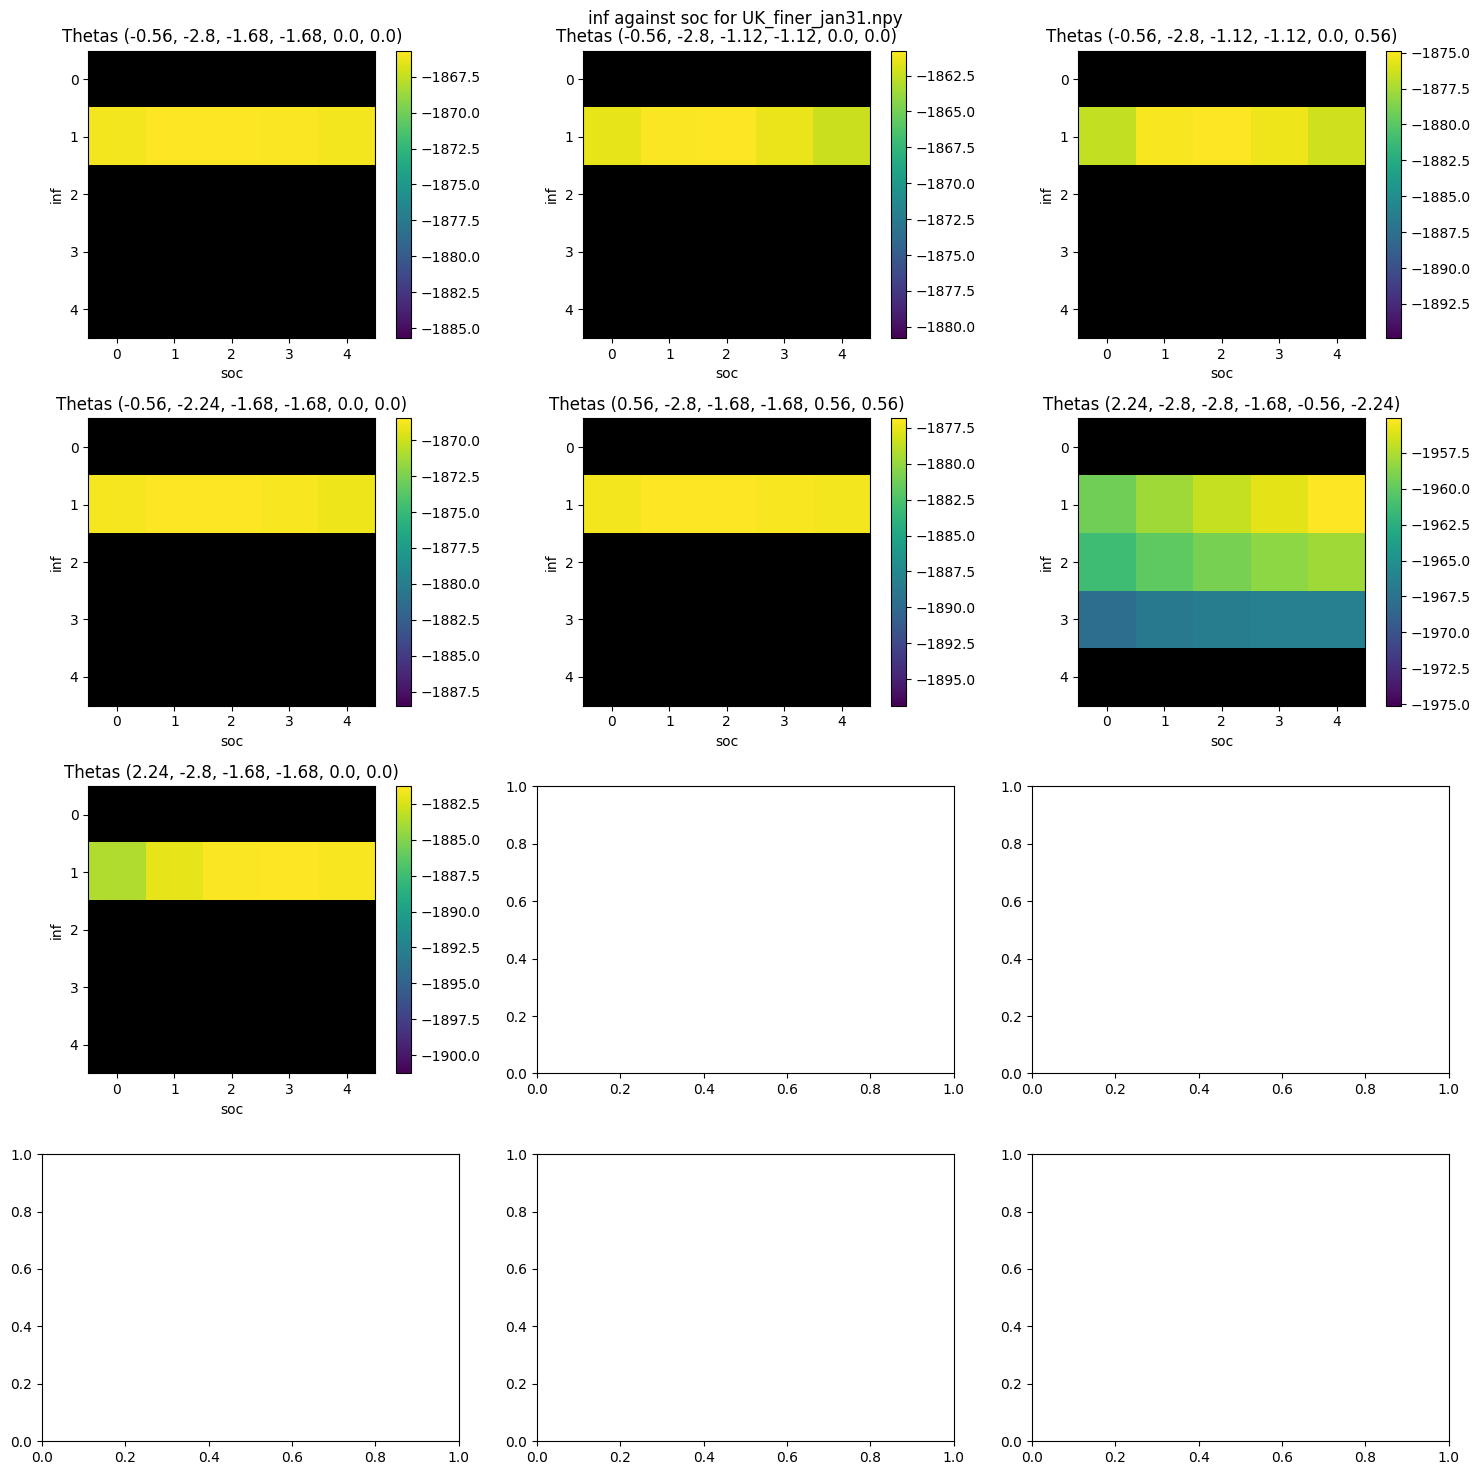

US_finer_jan31.npy


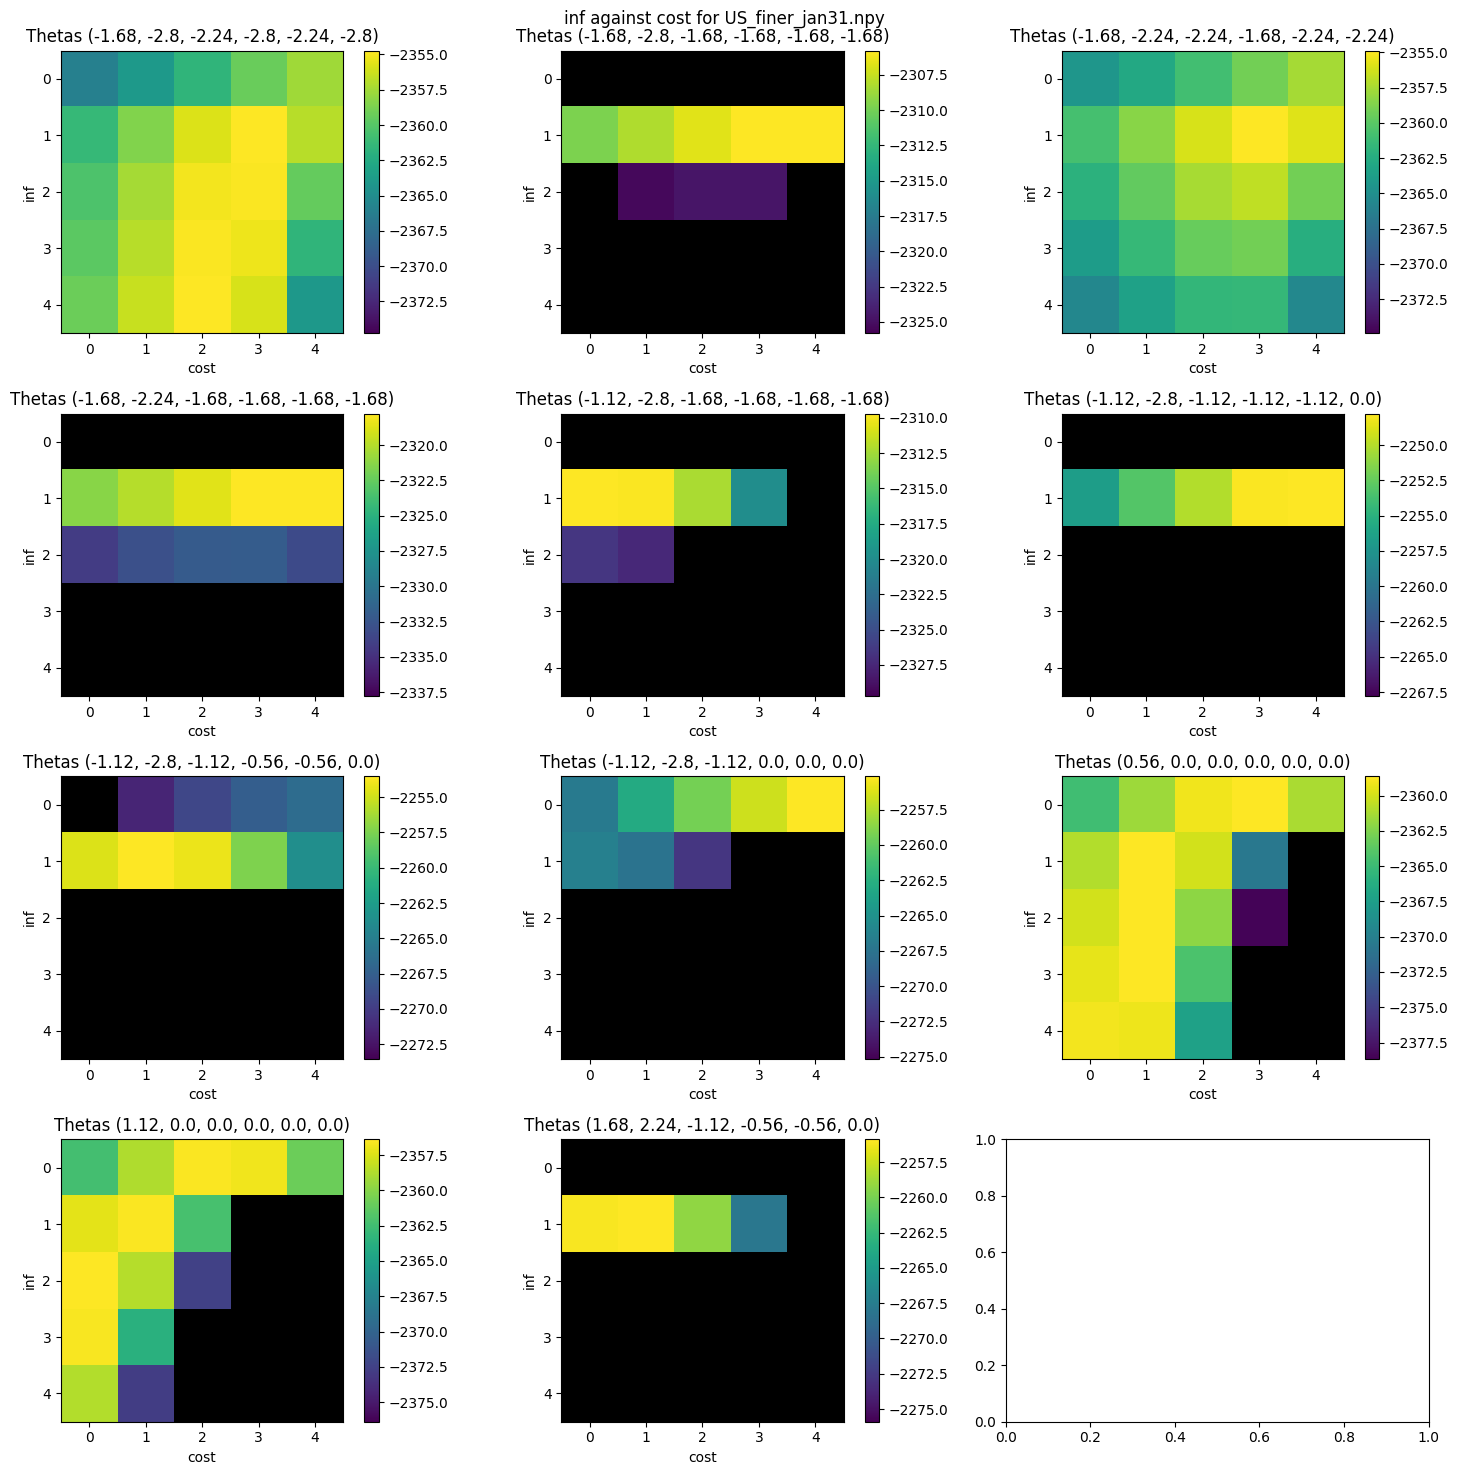

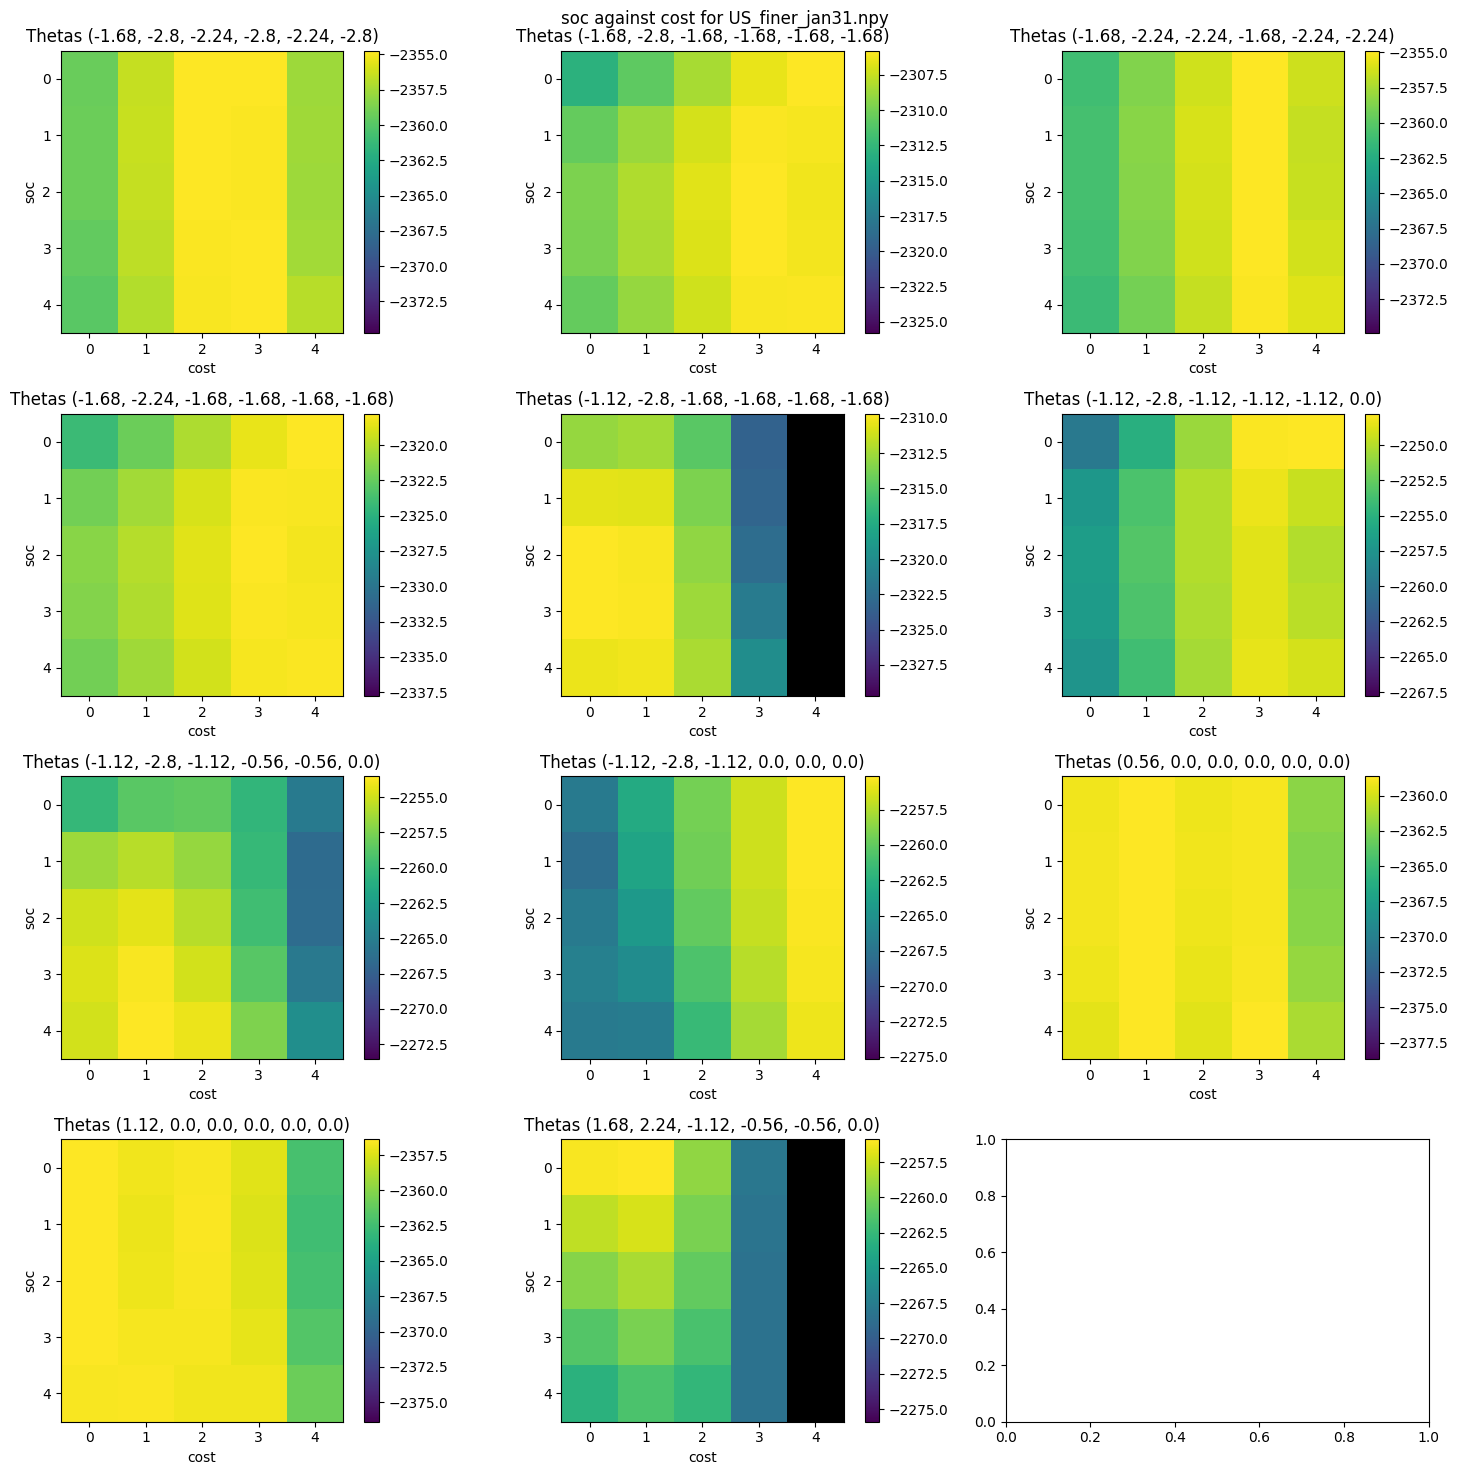

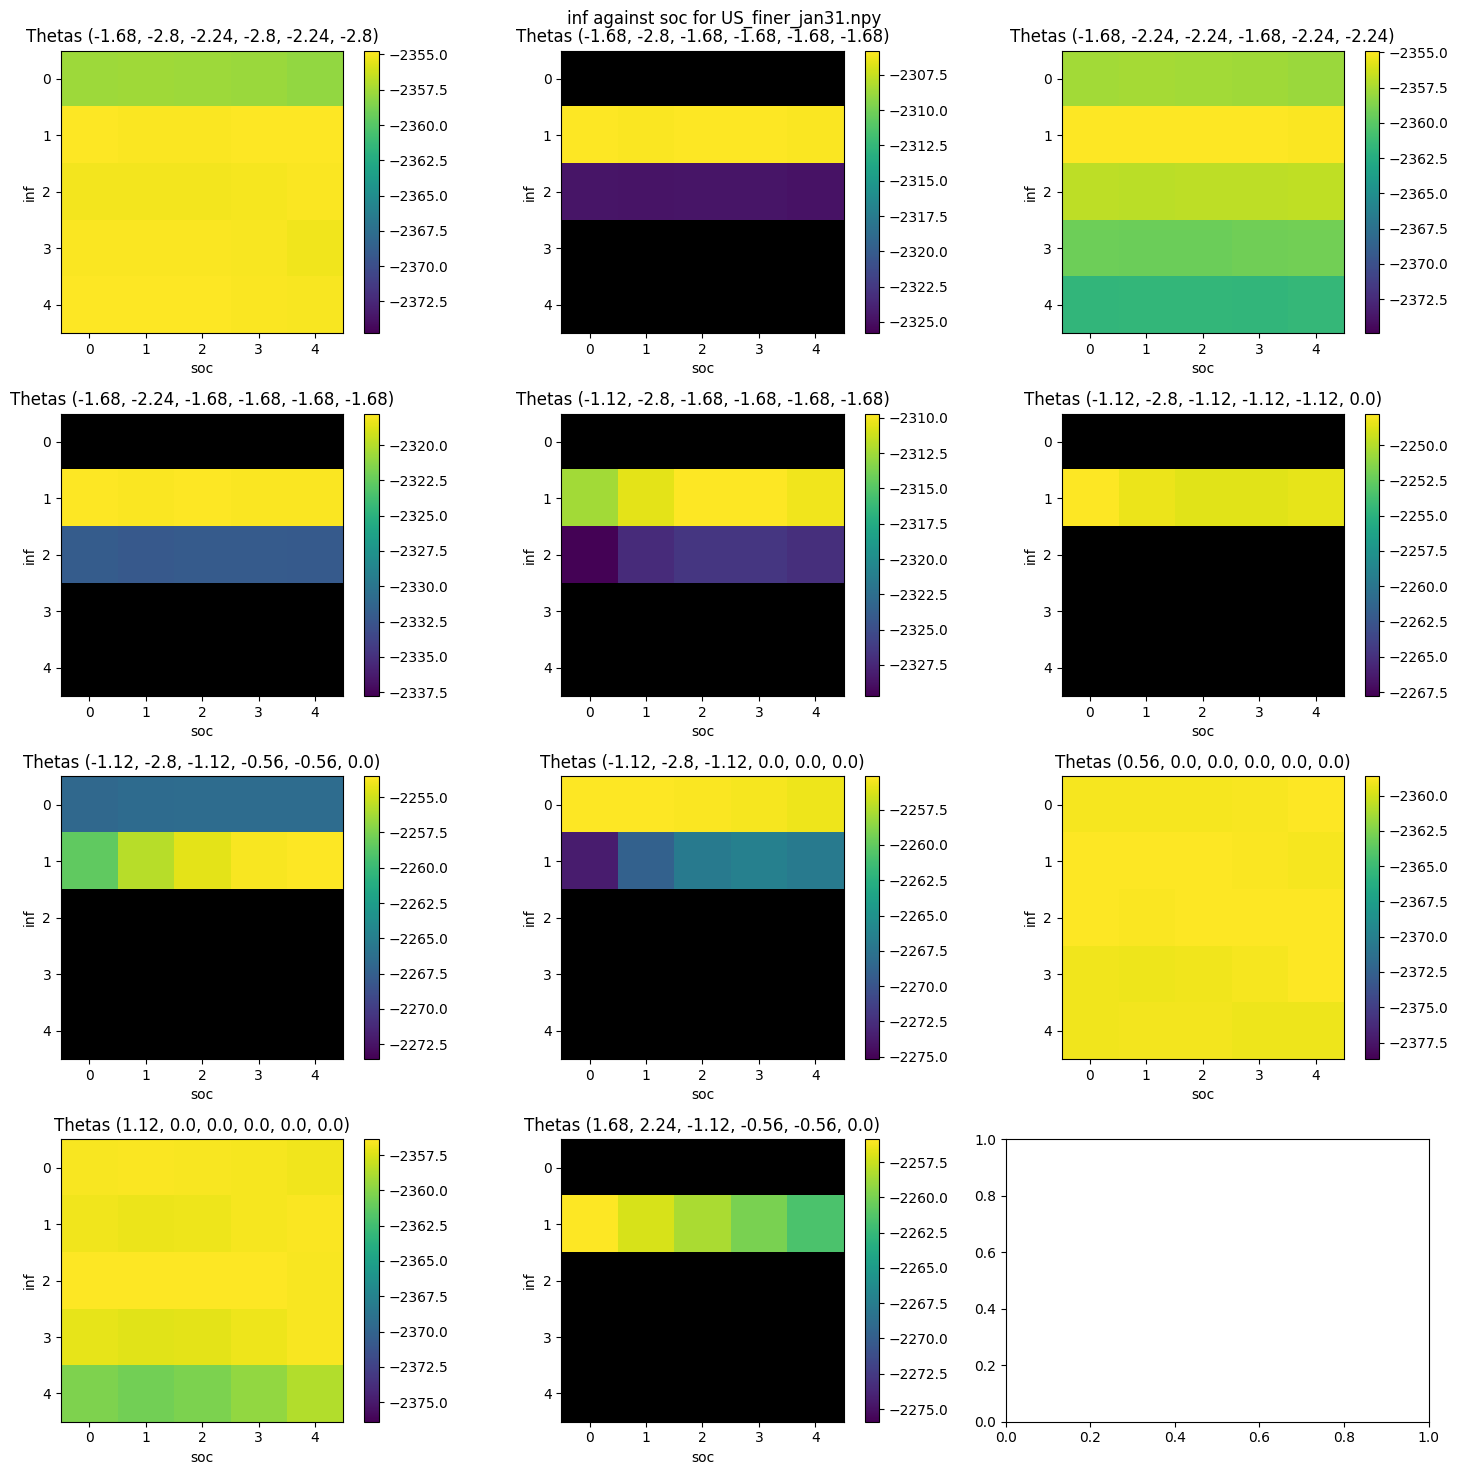

In [83]:
var_to_position = {'x':0,'y':1,'collapse':2}
for i, (cube_for_each_thetas ,unique_thetas,best_thetas) in enumerate(all_results[5:]):
    print(file_names[i+5])
    plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['x'], var_to_position['y'],var_to_position['collapse'],file_names[i+5])
    plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['x'], var_to_position['collapse'],var_to_position['y'],file_names[i+5])
    plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['collapse'], var_to_position['y'],var_to_position['x'],file_names[i+5])

In [87]:
var_to_position = {'x':0,'y':1,'collapse':2}
for i, (cube_for_each_thetas ,unique_thetas,best_thetas) in enumerate(all_results):
    print(file_names[i])
    print(np.max([np.max(cube) for cube in cube_for_each_thetas]))
    print([(np.max(cube),np.argmax(cube) )for cube in cube_for_each_thetas])
    print(unique_thetas)
    # plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['x'], var_to_position['y'],var_to_position['collapse'],file_names[i+5])
    # plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['x'], var_to_position['collapse'],var_to_position['y'],file_names[i+5])
    # plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['collapse'], var_to_position['y'],var_to_position['x'],file_names[i+5])

UK_standard_jan31.npy
-1888.0645
[(np.float32(-2021.4589), np.int64(1)), (np.float32(-1983.3206), np.int64(9)), (np.float32(-1888.0645), np.int64(33)), (np.float32(-1909.6449), np.int64(84)), (np.float32(-1993.2546), np.int64(59)), (np.float32(-1976.2407), np.int64(59)), (np.float32(-1953.7334), np.int64(59)), (np.float32(-1906.8612), np.int64(59)), (np.float32(-1901.603), np.int64(32)), (np.float32(-1916.6465), np.int64(83))]
[(-2.8, -2.8, -2.8, -2.8, -2.8, -2.8), (-2.8, -2.8, -2.8, -1.68, -1.12, -2.24), (-0.56, -2.8, -1.68, -1.68, 0.0, 0.0), (0.56, -2.8, -1.68, -1.68, 0.56, 0.56), (2.24, -2.8, -2.8, -1.68, -1.68, -2.24), (2.24, -2.8, -2.8, -1.68, -1.12, -2.24), (2.24, -2.8, -2.8, -1.68, -0.56, -2.24), (2.24, -2.8, -2.8, -1.68, 0.0, 0.0), (2.24, -2.8, -1.68, -1.68, 0.0, 0.0), (2.24, 2.24, 2.24, -1.68, 0.0, 0.0)]
US_standard_jan31.npy
-2279.6848
[(np.float32(-2374.564), np.int64(25)), (np.float32(-2367.8916), np.int64(24)), (np.float32(-2354.6848), np.int64(59)), (np.float32(-2362.662)

In [ ]:
var_to_position = {'x':0,'y':1,'collapse':2}
for i, (cube_for_each_thetas ,unique_thetas,best_thetas) in enumerate(all_results):
    print(file_names[i])
    plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['x'], var_to_position['y'],var_to_position['collapse'],file_names[i+5])
    plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['x'], var_to_position['collapse'],var_to_position['y'],file_names[i+5])
    plot_results(cube_for_each_thetas ,unique_thetas, var_to_position['collapse'], var_to_position['y'],var_to_position['x'],file_names[i+5])

In [54]:
# best coordinate for UK is 4,0,2,2,5,5,1,1,3
# best coordinate for US is 3,0,3,3,3,5,2,1,0

array([     0,    231, 402255, 602266, 900221, 900231, 900241, 900255,
       902255, 999255])